<a href="https://colab.research.google.com/github/pgbio99/ML_Project_Beginners/blob/main/KM_cluster_downreg_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving downregulated_genes.csv to downregulated_genes (2).csv


{'downregulated_genes (2).csv': b'SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B\r\nUSP44,-0.894920495,4.879434792,-8.163888274,2.19E-11,7.07E-07,15.46405031\r\nOXTR,-1.950782819,6.886820679,-7.243985691,8.50E-10,1.24E-05,12.06020839\r\nCAVIN2,-1.649063979,6.534448571,-7.166518257,1.16E-09,1.24E-05,11.77310967\r\nPAMR1,-1.875026903,6.705796216,-7.090218748,1.57E-09,1.24E-05,11.49042834\r\nSMYD1,-1.424803443,4.788230358,-7.039496372,1.92E-09,1.24E-05,11.30257455\r\nKLF15,-0.92696957,6.495385474,-6.86956049,3.76E-09,1.75E-05,10.6737549\r\nMYOC,-1.214596294,4.302510161,-6.838401606,4.25E-09,1.75E-05,10.55857161\r\nPIGR,-3.637576445,7.442673381,-6.834428823,4.32E-09,1.75E-05,10.54388864\r\nCNN1,-1.871341533,7.569732487,-6.776312752,5.44E-09,1.84E-05,10.32918052\r\nHIF3A,-0.709222525,6.407940554,-6.76415822,5.70E-09,1.84E-05,10.28429647\r\nNPY2R,-1.013901586,5.648547158,-6.559106796,1.28E-08,2.96E-05,9.5283503\r\nCXCL2,-2.162352914,6.483414874,-6.508114661,1.57E-08,3.38E-05,9.340789448\r\nRYR3,

In [ ]:
df = pd.read_csv("downregulated_genes.csv")
df.head()

,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,USP44,-0.894920,4.879435,-8.163888,2.190000e-11,7.070000e-07,15.464050
1,OXTR,-1.950783,6.886821,-7.243986,8.500000e-10,1.240000e-05,12.060208
2,CAVIN2,-1.649064,6.534449,-7.166518,1.160000e-09,1.240000e-05,11.773110
3,PAMR1,-1.875027,6.705796,-7.090219,1.570000e-09,1.240000e-05,11.490428
4,SMYD1,-1.424803,4.788230,-7.039496,1.920000e-09,1.240000e-05,11.302575


In [ ]:
df

,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,USP44,-0.894920,4.879435,-8.163888,2.190000e-11,7.070000e-07,15.464050
1,OXTR,-1.950783,6.886821,-7.243986,8.500000e-10,1.240000e-05,12.060208
2,CAVIN2,-1.649064,6.534449,-7.166518,1.160000e-09,1.240000e-05,11.773110
3,PAMR1,-1.875027,6.705796,-7.090219,1.570000e-09,1.240000e-05,11.490428
4,SMYD1,-1.424803,4.788230,-7.039496,1.920000e-09,1.240000e-05,11.302575
...,...,...,...,...,...,...,...
181,SH3BGRL2,-0.393068,7.611361,-4.699054,1.520000e-05,1.148406e-03,2.930048
182,COL3A1,-0.921902,5.158450,-4.696140,1.530000e-05,1.152355e-03,2.920320
183,OAS3,-0.459995,6.317090,-4.693904,1.550000e-05,1.156338e-03,2.912859
184,KRT17,-1.554212,7.866637,-4.690763,1.560000e-05,1.163791e-03,2.902377


Text(0, 0.5, 'adj.P.Val')

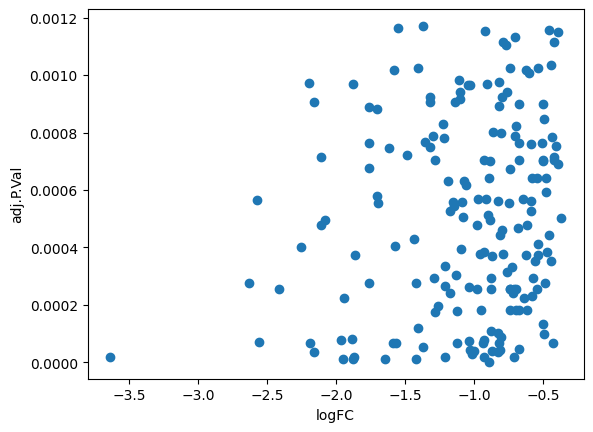

In [ ]:
plt.scatter(df.logFC,df['adj.P.Val'])
plt.xlabel('logFC')
plt.ylabel('adj.P.Val')

Elbow plot help to suggest what should be the value of K as per data

In [ ]:
sse=[]
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['logFC','adj.P.Val']])
  sse.append(km.inertia_)

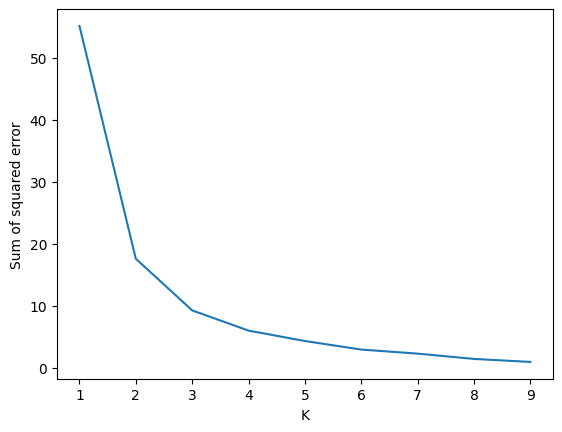

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

K=3 , chose as per elbow plt

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['logFC','adj.P.Val']])
y_predicted

array([2, 1, 1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0,
       0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1,
       2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0,
       0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,SYMBOL,logFC,AveExpr,t,P.Value,adj.P.Val,B,cluster
0,USP44,-0.894920,4.879435,-8.163888,2.190000e-11,7.070000e-07,15.464050,2
1,OXTR,-1.950783,6.886821,-7.243986,8.500000e-10,1.240000e-05,12.060208,1
2,CAVIN2,-1.649064,6.534449,-7.166518,1.160000e-09,1.240000e-05,11.773110,1
3,PAMR1,-1.875027,6.705796,-7.090219,1.570000e-09,1.240000e-05,11.490428,1
4,SMYD1,-1.424803,4.788230,-7.039496,1.920000e-09,1.240000e-05,11.302575,2


In [ ]:
km.cluster_centers_

array([[-6.28038753e-01,  5.54989305e-04],
       [-1.98820454e+00,  4.31811286e-04],
       [-1.10881567e+00,  4.72764217e-04]])

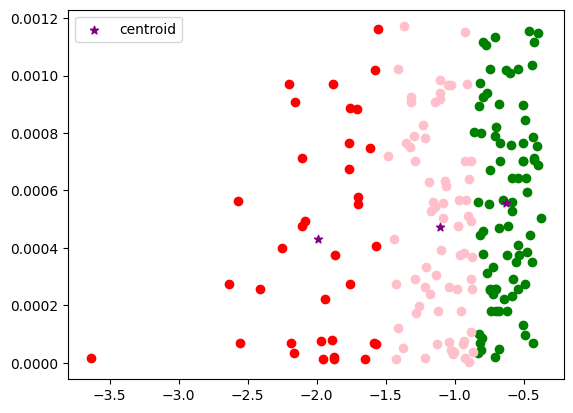

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter (df1.logFC,df1['adj.P.Val'],color='green')
plt.scatter (df2.logFC,df2['adj.P.Val'],color='red')
plt.scatter (df3.logFC,df3['adj.P.Val'],color='pink')
plt.scatter (km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
red_cluster_genes = df[df['cluster']==1]
all_red_cluster_genes_symbol = red_cluster_genes.SYMBOL.tolist()
print("Highly significant downregualted genes: ", all_red_cluster_genes_symbol)

Highly significant downregualted genes:  ['OXTR', 'CAVIN2', 'PAMR1', 'PIGR', 'CNN1', 'CXCL2', 'COL17A1', 'ZBTB16', 'LMOD1', 'CLDN8', 'DMD', 'HLF', 'GINS1', 'BTNL9', 'H3-3A', 'H3P6', 'TIMM17A', 'PRPH', 'ADAMTS6', 'H3C10', 'CENPI', 'CLSPN', 'ARHGAP11A', 'FAM13A', 'ACACB', 'MME', 'TACC3', 'OVCH2', 'H4C12', 'H4C11', 'PLAUR', 'OR5P2', 'CNTNAP3P2', 'ARL6IP1', 'KRT17']
